In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline 
from matplotlib import pyplot as plt 
import seaborn as sns 

In [2]:
pd.set_option('display.max_columns', 47)

In [3]:
df_train = pd.read_csv('../../data/CUP_IT_train_data_1.csv',skiprows = 133)

In [4]:
df_train

,cif_id,dlk_cob_date,gi_smooth_3m,big_city,cu_gender,cu_education_level,cu_empl_area,cu_empl_level,payroll_f,cur_quantity_pl,cur_quantity_mort,cur_quantity_cc,cur_quantity_deposits,cur_quantity_dc,cur_quantity_accounts,cur_quantity_saccounts,cur_quantity_mf,cc_balance,cl_balance,ml_balance,pl_balance,td_volume,ca_volume,sa_volume,mf_volume,dc_cash_spend_v,dc_cash_spend_c,cc_cash_spend_v,cc_cash_spend_c,dc_pos_spend_v,dc_pos_spend_c,cc_pos_spend_v,cc_pos_spend_c,ca_f,rc_session_qnt_cur_mon,cur_qnt_sms,active,standalone_dc_f,standalone_payroll_dc_f,standalone_nonpayroll_dc_f,salary,cu_age,cu_mob,cu_empl_cur_dur_m,is_married,cu_eduaction_level
0,335992,2018-06-30,17.957530,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,0,0,0,1,1,0,0,NaN,NaN,NaN,-1700.60184,NaN,4.62528,NaN,NaN,0.0,0,0.0,0,10.41888,3,0.0,0,1,0,1.0,1,0,0,0,1192.8,29.0,144,46.0,1,2
1,335992,2018-04-30,27.720918,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,0,0,0,1,1,0,0,NaN,NaN,NaN,-1911.42936,NaN,300.73056,NaN,NaN,168.0,2,0.0,0,190.21536,14,0.0,0,1,0,1.0,1,0,0,0,1192.8,29.0,142,44.0,1,2
2,335992,2018-05-31,21.949626,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,0,0,0,1,1,0,0,NaN,NaN,NaN,-1807.09176,NaN,13.04472,NaN,NaN,0.0,0,0.0,0,161.63760,16,0.0,0,1,0,1.0,1,0,0,0,1192.8,29.0,143,45.0,1,2
3,335992,2018-08-31,14.855459,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,0,0,0,1,1,0,0,NaN,NaN,NaN,-1484.08752,NaN,0.35184,NaN,NaN,0.0,0,0.0,0,0.00000,0,0.0,0,1,0,1.0,1,0,0,0,1192.8,29.0,146,48.0,1,2
4,335992,2018-03-31,27.917161,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,0,0,0,1,1,0,0,NaN,NaN,NaN,-2015.04648,NaN,793.68216,NaN,NaN,333.6,3,0.0,0,322.27032,28,0.0,0,1,0,1.0,1,0,0,0,1192.8,29.0,141,43.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4161778,120605,2018-06-30,52.379263,MSK,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,0,0,0,1,1,0,0,NaN,NaN,NaN,-11050.39320,NaN,2.33736,NaN,NaN,33.6,2,0.0,0,0.00000,0,0.0,0,1,5,-100.0,1,1,0,1,960.0,34.0,115,31.0,1,2
4161779,120605,2018-02-28,54.218822,MSK,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,0,0,0,1,1,0,0,NaN,NaN,NaN,-11773.29480,NaN,2.52936,NaN,NaN,0.0,0,0.0,0,0.00000,0,0.0,0,1,2,-100.0,1,1,0,1,960.0,33.0,111,27.0,1,2
4161780,120605,2018-03-31,53.343644,MSK,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,0,0,0,1,1,0,0,NaN,NaN,NaN,-11597.15040,NaN,1.29336,NaN,NaN,0.0,0,0.0,0,1.58400,1,0.0,0,1,5,-100.0,1,1,0,1,960.0,33.0,112,28.0,1,2
4161781,120605,2018-04-30,52.248182,MSK,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,0,0,0,1,1,0,0,NaN,NaN,NaN,-11415.40656,NaN,1.64136,NaN,NaN,0.0,0,0.0,0,0.00000,0,0.0,0,1,2,-100.0,1,1,0,1,960.0,34.0,113,29.0,1,2


In [5]:
df_train.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4161783 entries, 0 to 4161782
Data columns (total 46 columns):
cif_id                        4161783 non-null int64
dlk_cob_date                  4161783 non-null object
gi_smooth_3m                  4161783 non-null float64
big_city                      4161783 non-null object
cu_gender                     4161783 non-null int64
cu_education_level            3792728 non-null object
cu_empl_area                  3388776 non-null object
cu_empl_level                 3666449 non-null object
payroll_f                     4161783 non-null int64
cur_quantity_pl               4161783 non-null int64
cur_quantity_mort             4161783 non-null int64
cur_quantity_cc               4161783 non-null int64
cur_quantity_deposits         4161783 non-null int64
cur_quantity_dc               4161783 non-null int64
cur_quantity_accounts         4161783 non-null int64
cur_quantity_saccounts        4161783 non-null int64
cur_quantity_mf               41

Можем видеть, что некоторые признаки(столбцы) сильно разрежены. Хотельсь бы их заполнить актуальными данными

In [6]:
df_train.describe()

,cif_id,gi_smooth_3m,cu_gender,payroll_f,cur_quantity_pl,cur_quantity_mort,cur_quantity_cc,cur_quantity_deposits,cur_quantity_dc,cur_quantity_accounts,cur_quantity_saccounts,cur_quantity_mf,cc_balance,cl_balance,ml_balance,pl_balance,td_volume,ca_volume,sa_volume,mf_volume,dc_cash_spend_v,dc_cash_spend_c,cc_cash_spend_v,cc_cash_spend_c,dc_pos_spend_v,dc_pos_spend_c,cc_pos_spend_v,cc_pos_spend_c,ca_f,rc_session_qnt_cur_mon,cur_qnt_sms,active,standalone_dc_f,standalone_payroll_dc_f,standalone_nonpayroll_dc_f,salary,cu_age,cu_mob,cu_empl_cur_dur_m,is_married,cu_eduaction_level
count,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,1.598932e+06,83270.000000,1.797400e+05,1.898900e+06,14913.000000,4.056503e+06,297480.000000,11375.000000,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06,4.161783e+06
mean,2.561075e+05,4.017062e+01,5.401891e-01,2.629013e-01,5.006443e-01,4.335161e-02,7.480239e-01,3.827206e-03,8.437559e-01,1.303357e+00,8.238296e-02,3.780351e-03,-1.042465e+03,-2996.838400,-3.776694e+04,-7.298672e+03,8281.007293,3.337234e+02,962.431591,2429.915738,2.750245e+02,1.077176e+00,1.440580e+01,7.544891e-02,1.406890e+02,7.691187e+00,8.317771e+01,2.867909e+00,9.747032e-01,4.812689e+00,-4.720424e+01,9.299317e-01,4.750651e-01,6.241484e-02,4.126503e-01,1.311355e+03,3.999270e+01,8.443463e+01,9.698892e+01,6.319267e-01,-6.383969e+00
std,1.473086e+05,5.402052e+01,4.983823e-01,4.402093e-01,5.919211e-01,2.044246e-01,9.918981e-01,6.569771e-02,5.793352e-01,6.978141e-01,3.310817e-01,8.327314e-02,1.623917e+03,2259.417517,2.706728e+04,7.038207e+03,21558.061855,1.556402e+03,3346.769090,2541.181316,1.113230e+03,2.304361e+00,1.419917e+02,5.081492e-01,4.294125e+02,1.746881e+01,3.525784e+02,1.048502e+01,1.570252e-01,1.389500e+01,5.054602e+01,2.552621e-01,4.993779e-01,2.419075e-01,4.923110e-01,1.084482e+03,9.437946e+00,5.128387e+01,7.352383e+01,4.822814e-01,2.921114e+01
min,1.001000e+03,-1.199554e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.431041e+04,-25782.684480,-1.298236e+06,-7.538658e+04,128.478960,-7.092194e+03,-5.575680,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00,-1.000000e+02,1.200000e+01,0.000000e+00,0.000000e+00,-1.000000e+02
25%,1.285530e+05,4.179842e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.544655e+03,-4143.951060,-4.947278e+04,-9.852199e+03,1260.448080,6.542400e-01,0.000240,685.993979,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.308000e+02,3.200000e+01,5.200000e+01,4.600000e+01,0.000000e+00,2.000000e+00
50%,2.559730e+05,2.197043e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-3.535328e+02,-2571.432120,-3.211763e+04,-5.398651e+03,2553.321840,1.059168e+01,1.962360,1668.764258,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.091502e+03,3.800000e+01,7.300000e+01,7.900000e+01,1.000000e+00,3.000000e+00
75%,3.837020e+05,5.714864e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1301.182920,-1.950321e+04,

In [7]:
df_train.nunique()

cif_id                         396576
dlk_cob_date                       12
gi_smooth_3m                  3817271
big_city                            4
cu_gender                           2
cu_education_level                  4
cu_empl_area                      134
cu_empl_level                      29
payroll_f                           2
cur_quantity_pl                     7
cur_quantity_mort                   4
cur_quantity_cc                    11
cur_quantity_deposits               6
cur_quantity_dc                    10
cur_quantity_accounts              12
cur_quantity_saccounts             21
cur_quantity_mf                    11
cc_balance                    1024964
cl_balance                      82938
ml_balance                     179288
pl_balance                    1824782
td_volume                        9031
ca_volume                     1360258
sa_volume                      145661
mf_volume                       11294
dc_cash_spend_v                 29052
dc_cash_spen

Выдвинем гипочезу, что пропуски в признаках, характеризующих баланс кредитных карт, баланс ипотеки и т.д. связан с отсутствием наличия таковых счетов. Следовательно при истинности выдвинутой гипотезы, правильнее было бы заполнить пропуски данных полей нулями, а не матожиданием или медианами.

### Проверка зависимости отсутствия значения (Nan) в признаке "счёт депозитов" (td_volume) от признака "кол-во депозитов" (cur_quantity_deposits)

Проверяем, есть ли вообще нуливые значения признака т.е. отсутстваие соответствующих счетов у клиентов банка 

In [8]:
df_train['cur_quantity_deposits'].value_counts(dropna = False)

0    4146758
1      14237
2        699
3         67
4         18
5          4
Name: cur_quantity_deposits, dtype: int64

Оцкниваем степерь разреженности признака

In [9]:
df_train['td_volume'].value_counts(dropna= False)

NaN           4146870
1200.00000        468
2400.00000        394
4800.00000        218
3600.00000        154
               ...   
2287.15392          1
7563.40344          1
7220.86344          1
6614.90952          1
1984.41144          1
Name: td_volume, Length: 9032, dtype: int64

In [10]:
df_train[df_train['cur_quantity_deposits'] == 0 ]['td_volume'].value_counts(dropna = False)

NaN    4146758
Name: td_volume, dtype: int64

Убеждаемся в истинности придположения. Видно что нули в столюуце (cur_quantity_deposits) практичести полностью пересекаются с множеством пропусков столбца (td_volume)

In [11]:
df_train['td_volume'] = df_train['td_volume'].fillna(0)

### Проделаем аналошичную процедуру для оставшихся признаков подобного типа 

## Проделываем то же самое для остальных пар признаков.  
### 1) кол - во персональных кредитов (cur_quantity_pl) : баланс кредитов (pl_balance) 

In [12]:
df_train['cur_quantity_pl'].value_counts(dropna= False)

0    2262844
1    1735582
2     144698
3      16368
4       1969
5        317
6          5
Name: cur_quantity_pl, dtype: int64

In [13]:
df_train['pl_balance'].value_counts(dropna= False)

 NaN            2262883
 0.00000            735
-12000.00000         44
-2161.41912          37
-2160.00000          36
                 ...   
-3683.49696           1
-5678.20344           1
-19116.22992          1
-2775.69528           1
-8007.09552           1
Name: pl_balance, Length: 1824783, dtype: int64

In [14]:
df_train[df_train['cur_quantity_pl'] == 0]['pl_balance'].value_counts(dropna = False)

NaN    2262844
Name: pl_balance, dtype: int64

In [15]:
df_train['pl_balance'] = df_train['pl_balance'].fillna(0)

### 2) кол-во ипотечных кредитов (cur_quantity_mort) : баланс ипотеки (ml_balance)

In [16]:
df_train['cur_quantity_mort'].value_counts(dropna= False)

0    3982009
1     179142
2        618
3         14
Name: cur_quantity_mort, dtype: int64

In [17]:
df_train['ml_balance'].value_counts(dropna = False)

 NaN             3982043
 0.00000              40
-22939.66800           8
-48000.00000           6
-38459.96712           5
                  ...   
-76426.12176           1
-41196.76128           1
-46017.53640           1
-113538.03624          1
-30662.98176           1
Name: ml_balance, Length: 179289, dtype: int64

In [18]:
df_train[df_train['cur_quantity_mort'] == 0]['ml_balance'].value_counts(dropna = False)

NaN    3982009
Name: ml_balance, dtype: int64

In [19]:
df_train['ml_balance'] = df_train['ml_balance'].fillna(0)

### 3) кол-во кредитных карт (cur_quantity_cc) : баланс кредитных карт (cc_balance)
### далее будет видно, что людей с нулевым счётом около 300 тыс, поэтому признак (cur_quantity_cc) желательно оставить

In [20]:
df_train['cur_quantity_cc'].value_counts(dropna= False)

0     2562827
2     1342096
1      187775
3       38044
4       29156
5        1090
6         701
8          64
7          25
9           3
10          2
Name: cur_quantity_cc, dtype: int64

In [21]:
df_train['cc_balance'].value_counts(dropna = False)

 NaN           2562851
 0.00000        318687
 0.24000          3732
 2.40000          1744
 0.02400          1704
                ...   
-16.92744            1
-640.63440           1
-615.10536           1
-965.62512           1
-1327.16976          1
Name: cc_balance, Length: 1024965, dtype: int64

In [22]:
df_train[df_train['cur_quantity_cc']==0]['cc_balance'].value_counts(dropna = False)

NaN    2562827
Name: cc_balance, dtype: int64

In [23]:
df_train['cc_balance'] = df_train['cc_balance'].fillna(0)

### 4) Кол-во счетов (cur_quantity_accounts) : баланс счетов (ca_volume) 

In [24]:
df_train['cur_quantity_accounts'].value_counts(dropna = False)

1     3045897
2      735248
3      213972
0      105280
4       46917
5       10267
6        3124
7         650
8         250
9         122
10         29
11         27
Name: cur_quantity_accounts, dtype: int64

В данном случае мы видим, что клиентов у которых нет счетов не существует, иначе как его можно отнести к клиентам банка ?

In [25]:
df_train['ca_volume'].value_counts(dropna = False)

 0.00000       343483
 NaN           105280
-1.44000        14388
 0.00024         6213
 0.00048         4464
                ...  
 226.41864          1
 70.28040           1
 1402.09320         1
 986.70624          1
 290.13864          1
Name: ca_volume, Length: 1360259, dtype: int64

Исходя из предыдущего суждения, заменим NaN на медиану 

In [26]:
ca_volume_median = df_train['ca_volume'].median()
ca_volume_median

10.59168

In [27]:
df_train['ca_volume'] = df_train['ca_volume'].fillna(ca_volume_median)

### 5) Кол-во накопительных счетов (cur_quantity_saccounts) : баланс накопительных счетов (sa_volume)
### далее будет видно, что людей с нулевым балансом накопительных карт около 72 тыс, поэтому признак (cur_quantity_saccounts) желательно оставить

In [28]:
df_train['cur_quantity_saccounts'].value_counts(dropna = False)

0     3864303
1      262786
2       28467
3        4292
4        1097
5         408
6         129
7          86
8          54
9          45
12         37
11         25
10         17
25         10
24          6
14          6
13          4
16          4
19          4
22          2
20          1
Name: cur_quantity_saccounts, dtype: int64

In [29]:
df_train['sa_volume'].value_counts(dropna = False)

NaN           3864303
0.00000         72212
0.00024          2997
0.00048          1740
0.00072          1408
               ...   
6638.43336          1
2762.18520          1
52.56456            1
1084.82928          1
4736.34744          1
Name: sa_volume, Length: 145662, dtype: int64

In [30]:
df_train[df_train['cur_quantity_saccounts'] == 0]['sa_volume'].value_counts(dropna = False)

NaN    3864303
Name: sa_volume, dtype: int64

In [31]:
df_train['sa_volume'] = df_train['sa_volume'].fillna(0)

### 6) Кол-во инвестиционных продуктов (cur_quantity_mf) : баланс инвестиций (mf_volume)

In [32]:
df_train['cur_quantity_mf'].value_counts(dropna = False)

0     4150413
1        8497
2        1828
3         765
4         191
5          40
6          38
10          3
8           3
7           3
9           2
Name: cur_quantity_mf, dtype: int64

In [33]:
df_train['mf_volume'].value_counts(dropna = False)

NaN            4150408
0.000000             5
560.504400           3
563.585760           3
570.160800           3
                ...   
1667.609182          1
1880.941080          1
4909.021771          1
120.976188           1
1358.525938          1
Name: mf_volume, Length: 11295, dtype: int64

In [34]:
df_train[df_train['cur_quantity_mf'] == 0]['mf_volume'].value_counts(dropna = False)

NaN    4150408
0.0          5
Name: mf_volume, dtype: int64

In [35]:
df_train['mf_volume'] = df_train['mf_volume'].fillna(0)

### Убираем явно неактуальные признаки

In [36]:
not_actual_feat  = ['cu_education_level', 'cu_empl_area', 'cu_empl_level', 'cu_empl_cur_dur_m']
not_actual_df = df_train[not_actual_feat]
df_train.drop(not_actual_feat, axis = 1, inplace = True)

In [37]:
df_train['cl_balance'].value_counts(dropna = False)

 NaN           4078513
 0.00000           138
-1399.72032          9
-1523.71824          5
-2.95560             5
                ...   
-1667.53272          1
-4394.46216          1
-358.29528           1
-3086.90448          1
-1561.51944          1
Name: cl_balance, Length: 82939, dtype: int64

Слишком много пропусков, отбросим этот параметр

In [38]:
not_actual_df['cl_balance'] = df_train['cl_balance']
df_train.drop('cl_balance', axis = 1, inplace = True)

/Users/user/Documents/GitHub/mlcourse.ai/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Убедимся, что пропусков в данных больше нет 

In [39]:
df_train.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4161783 entries, 0 to 4161782
Data columns (total 41 columns):
cif_id                        4161783 non-null int64
dlk_cob_date                  4161783 non-null object
gi_smooth_3m                  4161783 non-null float64
big_city                      4161783 non-null object
cu_gender                     4161783 non-null int64
payroll_f                     4161783 non-null int64
cur_quantity_pl               4161783 non-null int64
cur_quantity_mort             4161783 non-null int64
cur_quantity_cc               4161783 non-null int64
cur_quantity_deposits         4161783 non-null int64
cur_quantity_dc               4161783 non-null int64
cur_quantity_accounts         4161783 non-null int64
cur_quantity_saccounts        4161783 non-null int64
cur_quantity_mf               4161783 non-null int64
cc_balance                    4161783 non-null float64
ml_balance                    4161783 non-null float64
pl_balance                    4

### Посмотрим на зависимость признаков 

In [40]:
corr_feats = list(df_train.columns.values)
corr_feats.remove('dlk_cob_date')
corr_feats.remove('big_city')

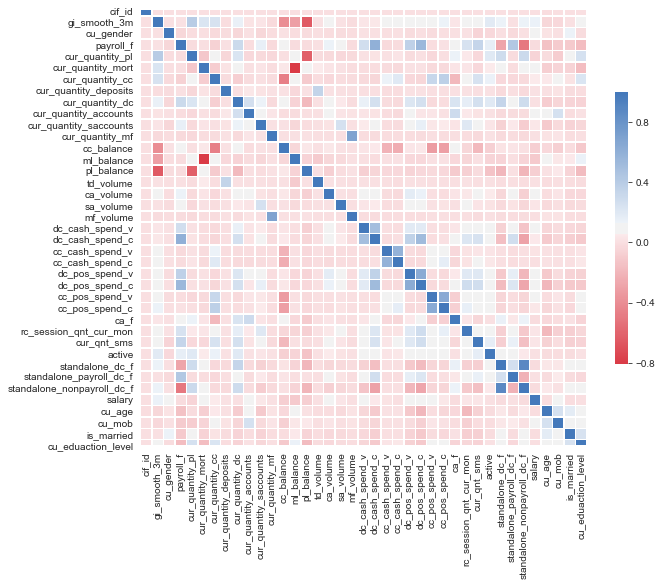

In [41]:
corr = df_train[corr_feats].corr()
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize = (10, 10))
cmap = sns.diverging_palette(10, 250, as_cmap = True)
sns.heatmap(corr, cmap = cmap, square = True, linewidths = .5, cbar_kws ={'shrink': .5}, ax = ax)

### Выделим коррелирующие признаки:    
    1. pl_balance ~ cur_quantity_pl  
    2. ml_balance ~ cur_quantity_mort  
    3. cc_balance ~ cur_quantity_cc                 Из прошлых заметок эелательно оставить оба признака  
    4. mf_volume ~ cur_quantity_mf  
    5. standalone_dc_f ~ standalone_payroll_dc_f    Наиболее ярко выраженная зависимость  
    6. dc_cash_spend_v ~ dc_cash_spend_c  
    7. cc_cash_spend_v ~ cc_cash_spend_c  
    8. dc_pos_spend_v ~ dc_pos_spend_c  
    9. cc_pos_spend_v ~ cc_pos_spend_c  

Исключим линейнозависимые признаки

In [42]:
more_corr_feats = ['cur_quantity_pl', 'cur_quantity_mort', 'cur_quantity_mf', 'standalone_payroll_dc_f',
                   'dc_cash_spend_c', 'cc_cash_spend_c', 'dc_pos_spend_c', 'cc_pos_spend_c']

df_more_corr_feats = df_train[more_corr_feats]
df_train.drop(more_corr_feats, axis = 1, inplace = True)

###  Закодируем котегориальные признаки 

In [43]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [44]:
df_train['dlk_cob_date'] = pd.to_datetime(df_train['dlk_cob_date'])

In [45]:
#какая то дичь в конце
df_train.drop('cu_eduaction_level', axis = 1, inplace = True)

In [46]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['big_city'], prefix = 'big_city'),
               pd.get_dummies(df_train['cu_gender'], prefix = 'cu_gender'),
               pd.get_dummies(df_train['payroll_f'], prefix = 'payroll_f'),
               pd.get_dummies(df_train['ca_f'], prefix = 'ca_f'),
               pd.get_dummies(df_train['standalone_dc_f'], prefix = 'standalone_dc_f'),
               pd.get_dummies(df_train['is_married'], prefix = 'is_married')], axis = 1)

In [47]:
df_train.drop(['big_city','cu_gender','payroll_f','ca_f','standalone_dc_f','is_married'], axis=1, inplace=True)

In [48]:
df_train.head()

,cif_id,dlk_cob_date,gi_smooth_3m,cur_quantity_cc,cur_quantity_deposits,cur_quantity_dc,cur_quantity_accounts,cur_quantity_saccounts,cc_balance,ml_balance,pl_balance,td_volume,ca_volume,sa_volume,mf_volume,dc_cash_spend_v,cc_cash_spend_v,dc_pos_spend_v,cc_pos_spend_v,rc_session_qnt_cur_mon,cur_qnt_sms,active,standalone_nonpayroll_dc_f,salary,cu_age,cu_mob,big_city_MLN,big_city_MSK,big_city_OTH,big_city_SPB,cu_gender_0,cu_gender_1,payroll_f_0,payroll_f_1,ca_f_0,ca_f_1,standalone_dc_f_0,standalone_dc_f_1,is_married_0,is_married_1
0,335992,2018-06-30,17.957530,0,0,1,1,0,0.0,0.0,-1700.60184,0.0,4.62528,0.0,0.0,0.0,0.0,10.41888,0.0,0,1.0,1,0,1192.8,29.0,144,1,0,0,0,1,0,1,0,0,1,1,0,0,1
1,335992,2018-04-30,27.720918,0,0,1,1,0,0.0,0.0,-1911.42936,0.0,300.73056,0.0,0.0,168.0,0.0,190.21536,0.0,0,1.0,1,0,1192.8,29.0,142,1,0,0,0,1,0,1,0,0,1,1,0,0,1
2,335992,2018-05-31,21.949626,0,0,1,1,0,0.0,0.0,-1807.09176,0.0,13.04472,0.0,0.0,0.0,0.0,161.63760,0.0,0,1.0,1,0,1192.8,29.0,143,1,0,0,0,1,0,1,0,0,1,1,0,0,1
3,335992,2018-08-31,14.855459,0,0,1,1,0,0.0,0.0,-1484.08752,0.0,0.35184,0.0,0.0,0.0,0.0,0.00000,0.0,0,1.0,1,0,1192.8,29.0,146,1,0,0,0,1,0,1,0,0,1,1,0,0,1
4,335992,2018-03-31,27.917161,0,0,1,1,0,0.0,0.0,-2015.04648,0.0,793.68216,0.0,0.0,333.6,0.0,322.27032,0.0,0,1.0,1,0,1192.8,29.0,141,1,0,0,0,1,0,1,0,0,1,1,0,0,1


Посмотрим происходит ли отток/приток клиентов 

In [49]:
df_train['dlk_cob_date'].value_counts()

2018-12-31    352587
2018-11-30    352363
2018-10-31    351881
2018-09-30    349972
2018-08-31    349531
2018-07-31    348271
2018-06-30    344518
2018-05-31    344017
2018-04-30    342862
2018-03-31    342185
2018-02-28    341961
2018-01-31    341635
Name: dlk_cob_date, dtype: int64

Видим, что данные взяты за определённый периуд работы банка, никаки образрм не отфильтромвнны, т.е. не все клиенты имеющиеся за 2018г изначально являются клиентами банка. 

### способ №1. Возьмём средние 
Попробуем спрогнозировать вероятность оттока клиента через 6 месяцев с помощью логистической регрессии.
Прибыль от клиента будем рассчитывать как средний доход на протяжении известного периода жизни (от 1 до 6 месяцев) умноженный на вероятность того, что клиент останется в банке.

Для представления о клиенте в качестве количественных признаков возьмем средние значерия соответствующего признака за последние 6 месяцев по данному клиенту(Речь не о все количественных признаках, а только о тех, по которым это логически целесообразно делать). Категориальные признаки приравняем к соответствующим за последний активный месяц.

#### Разделим обучающий датасет на тренировочный и тестовый, для проверки актуальности модели т.к. в нём имеется целевой признак.
В данном случае матрицей признаков будет информация за первые 6 месяцев 2018 года.  
В качестве целевого параметра возьмём информацию о активности клиента за декабрь 2018 года, для прогнозирования оттока, а после для прогнозирования дохода за 6 месяцев возьмём доход за эти 6 месяцев.  
Казалось бы, мы должны брать информацию об активность через 6 месяцев, а не за 12-й месяц. Например если человек в мае "ушёл из банка" и "вернулся" в августе того же года. В этом случае последний активный месяц в матрице признаков май (5-й), следовательно предсказывать мы должны отток к на ноябрь(11-й месяц), но мы предполагаем что вероятность возврата клиента слишком мала.Следовательно значение целевого признака, что для 11-го, что для 12-го месяца будет одно и то же.

In [50]:
df_06m = df_train[df_train['dlk_cob_date'] <= pd.to_datetime('2018-06-30')]

In [51]:
mean_feats =['cif_id','gi_smooth_3m', 'cc_balance', 'ml_balance', 'pl_balance','td_volume', 'ca_volume', 'sa_volume',
             'mf_volume', 'dc_cash_spend_v', 'cc_cash_spend_v', 'dc_pos_spend_v', 'cc_pos_spend_v', 
             'rc_session_qnt_cur_mon', 'cur_qnt_sms', 'salary']
mean_feats_df = df_06m[mean_feats].groupby('cif_id').mean()

In [52]:
mean_feats_df

,gi_smooth_3m,cc_balance,ml_balance,pl_balance,td_volume,ca_volume,sa_volume,mf_volume,dc_cash_spend_v,cc_cash_spend_v,dc_pos_spend_v,cc_pos_spend_v,rc_session_qnt_cur_mon,cur_qnt_sms,salary
cif_id,,,,,,,,,,,,,,,
1001,92.953501,-2379.09660,0.0,-2773.39628,0.0,2348.449040,0.0,0.0,0.00,0.0,0.00000,0.00000,0.000000,-100.0,1051.200000
1002,38.407051,0.00000,0.0,-2396.69580,0.0,178.286920,0.0,0.0,10.00,0.0,121.21484,0.00000,1.166667,-100.0,480.000000
1004,1.209461,-175.03976,0.0,0.00000,0.0,0.017520,0.0,0.0,0.00,0.0,0.00000,171.32368,0.000000,-100.0,960.000000
1005,0.007939,0.00000,0.0,0.00000,0.0,1.186560,0.0,0.0,0.00,0.0,0.00000,0.00000,0.000000,1.0,2608.416000
1007,1.757232,0.00000,0.0,0.00000,0.0,11.962000,0.0,0.0,164.00,0.0,61.41200,0.00000,0.000000,1.0,112.297920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511533,8.645392,0.00000,0.0,0.00000,0.0,568.475520,0.0,0.0,2007.74,0.0,560.45984,0.00000,2.333333,1.0,1861.059400
511534,62.881256,0.00000,0.0,-13274.66996,0.0,1888.240160,0.0,0.0,16.00,0.0,132.28800,0.00000,0.333333,-100.0,969.416849
511535,17.141562,0.00000,0.0,-2800.08720,0.0,29.798352,0.0,0.0,43.20,0.0,0.00000,0.00000,0.000000,-100.0,768.000000


Получаем последний актуальнай (активный) месяц клиента вплоть до середины года 

In [53]:
grouped = df_06m.sort_values('dlk_cob_date').groupby(['cif_id'], as_index = False)
new_06m_df = grouped.apply(lambda x: x.iloc[-1])

In [54]:
new_06m_df.index = new_06m_df['cif_id']
new_06m_df.index.names = ['index']
new_06m_df

,cif_id,dlk_cob_date,gi_smooth_3m,cur_quantity_cc,cur_quantity_deposits,cur_quantity_dc,cur_quantity_accounts,cur_quantity_saccounts,cc_balance,ml_balance,pl_balance,td_volume,ca_volume,sa_volume,mf_volume,dc_cash_spend_v,cc_cash_spend_v,dc_pos_spend_v,cc_pos_spend_v,rc_session_qnt_cur_mon,cur_qnt_sms,active,standalone_nonpayroll_dc_f,salary,cu_age,cu_mob,big_city_MLN,big_city_MSK,big_city_OTH,big_city_SPB,cu_gender_0,cu_gender_1,payroll_f_0,payroll_f_1,ca_f_0,ca_f_1,standalone_dc_f_0,standalone_dc_f_1,is_married_0,is_married_1
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,1001,2018-06-30,44.345863,1,0,0,3,0,-2397.91464,0.0,0.00000,0.0,3514.35960,0.0,0.0,0.00,0.0,0.00000,0.00000,0,-100.0,1,0,1051.200000,56.0,126,1,0,0,0,0,1,1,0,0,1,1,0,0,1
1002,1002,2018-06-30,27.042967,0,0,1,1,0,0.00000,0.0,-2278.98000,0.0,5.83176,0.0,0.0,0.00,0.0,7.20000,0.00000,1,-100.0,1,1,480.000000,49.0,119,0,0,1,0,0,1,1,0,0,1,0,1,0,1
1004,1004,2018-06-30,6.434866,2,0,0,1,0,-754.55376,0.0,0.00000,0.0,0.01752,0.0,0.0,0.00,0.0,0.00000,612.10248,0,-100.0,1,0,960.000000,52.0,116,0,0,1,0,1,0,1,0,0,1,1,0,1,0
1005,1005,2018-06-30,0.007969,0,0,1,2,0,0.00000,0.0,0.00000,0.0,1.18656,0.0,0.0,0.00,0.0,0.00000,0.00000,0,1.0,0,1,2608.416000,54.0,96,0,1,0,0,0,1,1,0,0,1,0,1,0,1
1007,1007,2018-06-30,2.323935,0,0,1,1,0,0.00000,0.0,0.00000,0.0,2.30064,0.0,0.0,0.00,0.0,57.79200,0.00000,0,1.0,1,0,112.297920,35.0,77,0,0,1,0,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511533,511533,2018-06-30,7.214876,0,0,1,1,0,0.00000,0.0,0.00000,0.0,1163.31240,0.0,0.0,4380.84,0.0,321.20136,0.00000,6,1.0,1,0,1858.896000,34.0,74,0,1,0,0,1,0,0,1,0,1,1,0,0,1
511534,511534,2018-06-30,86.190085,2,0,2,2,0,0.00000,0.0,-12842.70096,0.0,2102.79336,0.0,0.0,0.00,0.0,62.97600,0.00000,0,-100.0,1,1,969.416849,50.0,181,0,0,1,0,0,1,1,0,0,1,0,1,0,1
511535,511535,2018-06-30,17.372322,0,0,1,1,0,0.00000,0.0,-2683.74576,0.0,26.06304,0.0,0.0,0.00,0.0,0.00000,0.00000,0,-100.0,1,1,768.000000,51.0,98,0,0,1,0,0,1,1,0,0,1,0,1,0,1


In [55]:
new_06m_df[mean_feats[1:]] = mean_feats_df.loc[:] 

In [56]:
new_06m_df

,cif_id,dlk_cob_date,gi_smooth_3m,cur_quantity_cc,cur_quantity_deposits,cur_quantity_dc,cur_quantity_accounts,cur_quantity_saccounts,cc_balance,ml_balance,pl_balance,td_volume,ca_volume,sa_volume,mf_volume,dc_cash_spend_v,cc_cash_spend_v,dc_pos_spend_v,cc_pos_spend_v,rc_session_qnt_cur_mon,cur_qnt_sms,active,standalone_nonpayroll_dc_f,salary,cu_age,cu_mob,big_city_MLN,big_city_MSK,big_city_OTH,big_city_SPB,cu_gender_0,cu_gender_1,payroll_f_0,payroll_f_1,ca_f_0,ca_f_1,standalone_dc_f_0,standalone_dc_f_1,is_married_0,is_married_1
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,1001,2018-06-30,92.953501,1,0,0,3,0,-2379.09660,0.0,-2773.39628,0.0,2348.449040,0.0,0.0,0.00,0.0,0.00000,0.00000,0.000000,-100.0,1,0,1051.200000,56.0,126,1,0,0,0,0,1,1,0,0,1,1,0,0,1
1002,1002,2018-06-30,38.407051,0,0,1,1,0,0.00000,0.0,-2396.69580,0.0,178.286920,0.0,0.0,10.00,0.0,121.21484,0.00000,1.166667,-100.0,1,1,480.000000,49.0,119,0,0,1,0,0,1,1,0,0,1,0,1,0,1
1004,1004,2018-06-30,1.209461,2,0,0,1,0,-175.03976,0.0,0.00000,0.0,0.017520,0.0,0.0,0.00,0.0,0.00000,171.32368,0.000000,-100.0,1,0,960.000000,52.0,116,0,0,1,0,1,0,1,0,0,1,1,0,1,0
1005,1005,2018-06-30,0.007939,0,0,1,2,0,0.00000,0.0,0.00000,0.0,1.186560,0.0,0.0,0.00,0.0,0.00000,0.00000,0.000000,1.0,0,1,2608.416000,54.0,96,0,1,0,0,0,1,1,0,0,1,0,1,0,1
1007,1007,2018-06-30,1.757232,0,0,1,1,0,0.00000,0.0,0.00000,0.0,11.962000,0.0,0.0,164.00,0.0,61.41200,0.00000,0.000000,1.0,1,0,112.297920,35.0,77,0,0,1,0,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511533,511533,2018-06-30,8.645392,0,0,1,1,0,0.00000,0.0,0.00000,0.0,568.475520,0.0,0.0,2007.74,0.0,560.45984,0.00000,2.333333,1.0,1,0,1861.059400,34.0,74,0,1,0,0,1,0,0,1,0,1,1,0,0,1
511534,511534,2018-06-30,62.881256,2,0,2,2,0,0.00000,0.0,-13274.66996,0.0,1888.240160,0.0,0.0,16.00,0.0,132.28800,0.00000,0.333333,-100.0,1,1,969.416849,50.0,181,0,0,1,0,0,1,1,0,0,1,0,1,0,1
511535,511535,2018-06-30,17.141562,0,0,1,1,0,0.00000,0.0,-2800.08720,0.0,29.798352,0.0,0.0,43.20,0.0,0.00000,0.00000,0.000000,-100.0,1,1,768.000000,51.0,98,0,0,1,0,0,1,1,0,0,1,0,1,0,1


Получение целевого признака (активность за декабоь 2018)

In [57]:
y_prototip = df_train[df_train['dlk_cob_date']== pd.to_datetime('2018-12-31')][['cif_id', 'active']]

In [58]:
y_prototip

,cif_id,active
10,335992,1
23,198842,1
26,234815,1
38,232515,1
55,127962,1
...,...,...
4161724,35890,1
4161738,201625,1
4161747,45980,1
4161764,261308,1


In [59]:
y= pd.merge(new_06m_df['cif_id'], y_prototip, on ='cif_id', how = 'left' )

In [60]:
y.index = y['cif_id']
y.drop('cif_id', axis= 1, inplace = True)
y.shape

(364617, 1)

In [61]:
y = y.fillna(0)

In [62]:
X = new_06m_df
X.index = X['cif_id']
X.drop(['cif_id', 'dlk_cob_date'], axis= 1, inplace = True)

In [63]:
X.fillna(0)

,gi_smooth_3m,cur_quantity_cc,cur_quantity_deposits,cur_quantity_dc,cur_quantity_accounts,cur_quantity_saccounts,cc_balance,ml_balance,pl_balance,td_volume,ca_volume,sa_volume,mf_volume,dc_cash_spend_v,cc_cash_spend_v,dc_pos_spend_v,cc_pos_spend_v,rc_session_qnt_cur_mon,cur_qnt_sms,active,standalone_nonpayroll_dc_f,salary,cu_age,cu_mob,big_city_MLN,big_city_MSK,big_city_OTH,big_city_SPB,cu_gender_0,cu_gender_1,payroll_f_0,payroll_f_1,ca_f_0,ca_f_1,standalone_dc_f_0,standalone_dc_f_1,is_married_0,is_married_1
cif_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,92.953501,1,0,0,3,0,-2379.09660,0.0,-2773.39628,0.0,2348.449040,0.0,0.0,0.00,0.0,0.00000,0.00000,0.000000,-100.0,1,0,1051.200000,56.0,126,1,0,0,0,0,1,1,0,0,1,1,0,0,1
1002,38.407051,0,0,1,1,0,0.00000,0.0,-2396.69580,0.0,178.286920,0.0,0.0,10.00,0.0,121.21484,0.00000,1.166667,-100.0,1,1,480.000000,49.0,119,0,0,1,0,0,1,1,0,0,1,0,1,0,1
1004,1.209461,2,0,0,1,0,-175.03976,0.0,0.00000,0.0,0.017520,0.0,0.0,0.00,0.0,0.00000,171.32368,0.000000,-100.0,1,0,960.000000,52.0,116,0,0,1,0,1,0,1,0,0,1,1,0,1,0
1005,0.007939,0,0,1,2,0,0.00000,0.0,0.00000,0.0,1.186560,0.0,0.0,0.00,0.0,0.00000,0.00000,0.000000,1.0,0,1,2608.416000,54.0,96,0,1,0,0,0,1,1,0,0,1,0,1,0,1
1007,1.757232,0,0,1,1,0,0.00000,0.0,0.00000,0.0,11.962000,0.0,0.0,164.00,0.0,61.41200,0.00000,0.000000,1.0,1,0,112.297920,35.0,77,0,0,1,0,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511533,8.645392,0,0,1,1,0,0.00000,0.0,0.00000,0.0,568.475520,0.0,0.0,2007.74,0.0,560.45984,0.00000,2.333333,1.0,1,0,1861.059400,34.0,74,0,1,0,0,1,0,0,1,0,1,1,0,0,1
511534,62.881256,2,0,2,2,0,0.00000,0.0,-13274.66996,0.0,1888.240160,0.0,0.0,16.00,0.0,132.28800,0.00000,0.333333,-100.0,1,1,969.416849,50.0,181,0,0,1,0,0,1,1,0,0,1,0,1,0,1
511535,17.141562,0,0,1,1,0,0.00000,0.0,-2800.08720,0.0,29.798352,0.0,0.0,43.20,0.0,0.00000,0.00000,0.000000,-100.0,1,1,768.000000,51.0,98,0,0,1,0,0,1,1,0,0,1,0,1,0,1


Проверим начи матрицу признаков и вектор ответов на наличие пропусков и значений сремящихся к бесконечности (они недопустимы при обучении лигейных моделей)

In [64]:
np.any(np.isnan(X)), np.any(np.isnan(y)), np.all(np.isfinite(X)), np.all(np.isfinite(y))

(False, False, True, True)

In [65]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron

разделим данный на обучающую и тестовую выборки в соотношении 7:3

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((255231, 38), (109386, 38), (255231, 1), (109386, 1))

Нормализуем матрицу признаков

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучим модель логистической регрессии 

In [70]:
logit  = LogisticRegression( random_state = 42)
logit.fit(X_train_scaled, y_train.values.ravel())
score = logit.score(X_test_scaled, y_test)           #соотношение верных предсказаний к неверным
valid_predict = logit.predict_proba(X_test_scaled)   #вероятности [оттока, (не оттока)] клиентов

In [71]:
valid_predict, valid_predict.shape

(array([[0.10828092, 0.89171908],
        [0.19077477, 0.80922523],
        [0.09816209, 0.90183791],
        ...,
        [0.02818083, 0.97181917],
        [0.04211641, 0.95788359],
        [0.07895323, 0.92104677]]), (109386, 2))

In [72]:
score

0.8267785639844222

In [73]:
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
C = np.linspace(0.5, 10, 20)
# create and fit a ridge regression model, testing each alpha
model = LogisticRegression(random_state = 42)
grid = GridSearchCV(estimator=model, param_grid={'C': C})
grid.fit(X_train_scaled, y_train.values.ravel())
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.C)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.8251231237584776
1.0


In [86]:
grid.predict_proba(X_test_scaled)

array([[0.10828092, 0.89171908],
       [0.19077477, 0.80922523],
       [0.09816209, 0.90183791],
       ...,
       [0.02818083, 0.97181917],
       [0.04211641, 0.95788359],
       [0.07895323, 0.92104677]])

In [87]:
grid.score(X_test_scaled, y_test)

0.8267785639844222

### Часть № 2 
Загорузим тестовую выборку и спрогнозируем доход каждого клиента через пол года.

In [88]:
df_test = pd.read_csv('../../data/CUP_IT_test_data.csv',skiprows = 133)

#### Исходя из предположения об однородности выборок (обучающей и тестовой) проведём такую же предобработку данных для тестовой выборки, без комментариев.

In [89]:
useless_feats = ['cur_quantity_pl', 'cur_quantity_mort', 'cur_quantity_mf', 'standalone_payroll_dc_f',
                 'dc_cash_spend_c', 'cc_cash_spend_c', 'dc_pos_spend_c', 'cc_pos_spend_c', 
                 'cu_education_level','cu_empl_area', 'cu_empl_level', 'cu_empl_cur_dur_m', 
                 'cl_balance', 'cu_eduaction_level', 'rank']
df_test.drop(useless_feats, axis = 1, inplace = True)

In [90]:
df_test = df_test.fillna(0)
ca_volume_median = df_test['ca_volume'].median()
df_test['ca_volume'] = df_test['ca_volume'].fillna(ca_volume_median)

In [91]:
df_test = pd.concat([df_test, pd.get_dummies(df_test['big_city'], prefix = 'big_city'),
               pd.get_dummies(df_test['cu_gender'], prefix = 'cu_gender'),
               pd.get_dummies(df_test['payroll_f'], prefix = 'payroll_f'),
               pd.get_dummies(df_test['ca_f'], prefix = 'ca_f'),
               pd.get_dummies(df_test['standalone_dc_f'], prefix = 'standalone_dc_f'),
               pd.get_dummies(df_test['is_married'], prefix = 'is_married')], axis = 1)

In [92]:
df_test.drop(['big_city','cu_gender','payroll_f','ca_f','standalone_dc_f','is_married'], axis=1, inplace=True)

In [93]:
df_test

,cif_id,dlk_cob_date,gi_smooth_3m,cur_quantity_cc,cur_quantity_deposits,cur_quantity_dc,cur_quantity_accounts,cur_quantity_saccounts,cc_balance,ml_balance,pl_balance,td_volume,ca_volume,sa_volume,mf_volume,dc_cash_spend_v,cc_cash_spend_v,dc_pos_spend_v,cc_pos_spend_v,rc_session_qnt_cur_mon,cur_qnt_sms,active,standalone_nonpayroll_dc_f,salary,cu_age,cu_mob,big_city_MLN,big_city_MSK,big_city_OTH,big_city_SPB,cu_gender_0,cu_gender_1,payroll_f_0,payroll_f_1,ca_f_0,ca_f_1,standalone_dc_f_0,standalone_dc_f_1,is_married_0,is_married_1
0,50514,2018-06-30,17.898438,0,0,1,2,0,0.00000,0.0,-2182.57200,0.0,23.05368,0.0,0.0,0.0,0.0,0.00000,0.00000,3,-100.0,1,1,960.00000,48.0,83,0,0,1,0,0,1,1,0,0,1,0,1,0,1
1,50514,2018-02-28,24.355419,0,0,1,2,0,0.00000,0.0,-3210.81288,0.0,3.11064,0.0,0.0,0.0,0.0,0.00000,0.00000,3,-100.0,1,1,960.00000,47.0,79,0,0,1,0,0,1,1,0,0,1,0,1,0,1
2,50514,2018-04-30,20.534134,0,0,1,2,0,0.00000,0.0,-2703.79896,0.0,13.08216,0.0,0.0,0.0,0.0,0.00000,0.00000,4,-100.0,1,1,960.00000,48.0,81,0,0,1,0,0,1,1,0,0,1,0,1,0,1
3,50514,2018-01-31,26.477938,0,0,1,2,0,0.00000,0.0,-3462.84264,0.0,19.72488,0.0,0.0,0.0,0.0,0.00000,0.00000,2,-100.0,1,1,960.00000,47.0,78,0,0,1,0,0,1,1,0,0,1,0,1,0,1
4,50514,2018-05-31,19.623962,0,0,1,2,0,0.00000,0.0,-2445.49896,0.0,30.06792,0.0,0.0,0.0,0.0,0.00000,0.00000,1,-100.0,1,1,960.00000,48.0,82,0,0,1,0,0,1,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683767,195116,2018-06-30,215.977387,2,0,1,1,0,-8870.57784,0.0,0.00000,0.0,311.78016,0.0,0.0,2328.0,0.0,2357.69184,468.62400,0,1.0,1,0,2588.73600,35.0,83,0,1,0,0,1,0,0,1,0,1,1,0,0,1
683768,195116,2018-04-30,171.179781,2,0,0,0,0,-9124.37136,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,2400.0,0.00000,3210.76008,0,1.0,1,0,1407.70872,35.0,81,0,1,0,0,1,0,1,0,1,0,1,0,0,1
683769,195116,2018-05-31,195.262540,2,0,1,1,0,-8813.44440,0.0,0.00000,0.0,1452.00000,0.0,0.0,180.0,0.0,0.00000,18.02880,0,1.0,1,0,1632.00000,35.0,82,0,1,0,0,1,0,0,1,0,1,1,0,0,1
683770,195116,2018-02-28,126.780871,2,0,0,0,0,-6891.11592,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,416.70384,0,1.0,1,0,1407.70872,35.0,79,0,1,0,0,1,0,1,0,1,0,1,0,0,1


In [94]:
def func(df):
    mean_feats =['cif_id','gi_smooth_3m', 'cc_balance', 'ml_balance', 'pl_balance','td_volume', 'ca_volume', 'sa_volume',
             'mf_volume', 'dc_cash_spend_v', 'cc_cash_spend_v', 'dc_pos_spend_v', 'cc_pos_spend_v', 
             'rc_session_qnt_cur_mon', 'cur_qnt_sms', 'salary']
    mean_feats_df = df[mean_feats].groupby('cif_id').mean()

    grouped = df.sort_values('dlk_cob_date').groupby(['cif_id'], as_index = False)
    new_06m_df = grouped.apply(lambda x: x.iloc[-1])

    new_06m_df.index = new_06m_df['cif_id']
    new_06m_df.index.names = ['index']

    new_06m_df[mean_feats[1:]] = mean_feats_df.loc[:] 

    X = new_06m_df
    X.index = X['cif_id']
    X.drop(['cif_id', 'dlk_cob_date'], axis= 1, inplace = True)
    return X

In [95]:
X_test = func(df_test)

Видим, что клиенты в тестовой и обучающей выборках не пересекаются 

In [96]:
len(set(df_test['cif_id'])), len(set(df_train['cif_id'])), len(set(df_train['cif_id']).intersection(set(df_test['cif_id']))) 

(113962, 396576, 0)

Стандартизуем оба датасета

In [97]:
scaler = StandardScaler()
X_all_train_scaled = scaler.fit_transform(X)
y_all_train = y
X_all_test_scaled = scaler.transform(X_test)

Проверяем на пропуски и большие значения

In [98]:
np.any(np.isnan(X_all_train_scaled)), np.any(np.isnan(y_all_train)),np.any(np.isnan(X_all_test_scaled)), np.all(np.isfinite(X_all_train_scaled)), np.all(np.isfinite(y_all_train)),  np.all(np.isfinite(X_all_test_scaled))

(False, False, False, True, True, True)

Обучение и получение результатов

In [99]:
logit  = LogisticRegression( random_state = 42)
logit.fit(X_all_train_scaled, y_all_train.values.ravel())
valid_predict = logit.predict_proba(X_all_test_scaled)

In [100]:
valid_predict, valid_predict.shape

(array([[0.05638302, 0.94361698],
        [0.15589754, 0.84410246],
        [0.87702179, 0.12297821],
        ...,
        [0.64306989, 0.35693011],
        [0.17627629, 0.82372371],
        [0.10468063, 0.89531937]]), (113962, 2))

Делаем предсказание

In [101]:
results = pd.DataFrame(X_test['gi_smooth_3m'])
results

,gi_smooth_3m
cif_id,
1000,53.940459
1003,75.117063
1006,2.433070
1008,1.346990
1012,7.442803
...,...
511518,50.378821
511519,38.737557
511523,2.941498


In [106]:
results['koef'] = valid_predict[:, 1]

In [107]:
results

,gi_smooth_3m,koef
cif_id,,
1000,53.940459,0.943617
1003,75.117063,0.844102
1006,2.433070,0.122978
1008,1.346990,0.561371
1012,7.442803,0.828159
...,...,...
511518,50.378821,0.900363
511519,38.737557,0.828330
511523,2.941498,0.356930


In [108]:
results['rez'] = results['gi_smooth_3m']*results['koef']*6

In [109]:
results

,gi_smooth_3m,koef,rez
cif_id,,,
1000,53.940459,0.943617,50.899134
1003,75.117063,0.844102,63.406498
1006,2.433070,0.122978,0.299215
1008,1.346990,0.561371,0.756160
1012,7.442803,0.828159,6.163827
...,...,...,...
511518,50.378821,0.900363,45.359239
511519,38.737557,0.828330,32.087489
511523,2.941498,0.356930,1.049909


In [111]:
results['rez'].to_csv('CUP_IT_2020')

In [112]:
import pickle

In [116]:
filename= 'logit_model.sav'
pickle.dump(logit, open(filename, 'wb'))

In [115]:
logit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
loaded_model = pickle.load(open(filename, 'rb'))

In [119]:
loaded_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
valid_predict = loaded_model.predict_proba(X_all_test_scaled)

In [121]:
valid_predict

array([[0.05638302, 0.94361698],
       [0.15589754, 0.84410246],
       [0.87702179, 0.12297821],
       ...,
       [0.64306989, 0.35693011],
       [0.17627629, 0.82372371],
       [0.10468063, 0.89531937]])